**1) Chargement et analyse préliminaire des données**

a) Après avoir pris connaissance du dataset (auto-mpg-dataset.txt) et de sa description (autompg-description.txt),
indiquez pour chaque colonne si la variable est qualitative ou quantitative.

* **Variables Quantitative:**
  
mpg (miles per gallon)  
cylinders  
displacement  
horsepower  
weight  
acceleration  
  
*  **Variables Qualitative:**
  
model year  
origin (1. america, 2: europe, 3: asia)  
car name  
  

b) Charger les données à partir du fichier texte contenant le dataset. L’objectif est de parvenir à
un objet pandas.DataFrame.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/auto-mpg-dataset.txt', sep='\s+', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


c) Déterminer pour chaque colonne, à l’aide d’une fonction, le nombre de valeurs manquantes et
leur taux (# valeurs manquantes/# valeurs total)

In [ ]:
import pandas as pd
def missing_values(data):
  nombre_de_valeurs_manquantes = data.isna().sum()
  taux = nombre_de_valeurs_manquantes / len(data)

  result_df_missing = pd.DataFrame({
    'nombre_de_valeurs_manquantes': nombre_de_valeurs_manquantes,
    'taux': taux
  })
  return result_df_missing
missing_values(df)

,nombre_de_valeurs_manquantes,taux
mpg,8,0.019704
cylinders,0,0.000000
displacement,0,0.000000
horsepower,6,0.014778
weight,0,0.000000
acceleration,0,0.000000
model_year,0,0.000000
origin,0,0.000000
car_name,0,0.000000


Représenter graphiquement les données à l’aide de plusieurs nuages de points en deux dimensions.
L’axe vertical devra correspondre à la consommation (première colonne) et l’axe horizontal devra correspondre successivement à toutes les autres variables quantitatives.


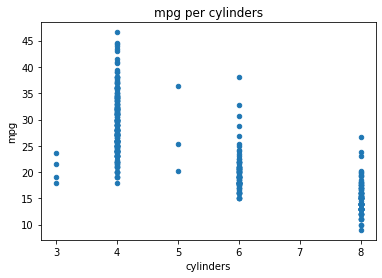

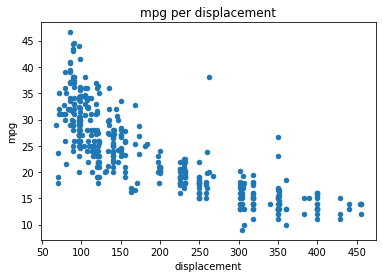

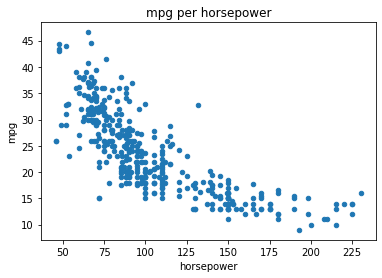

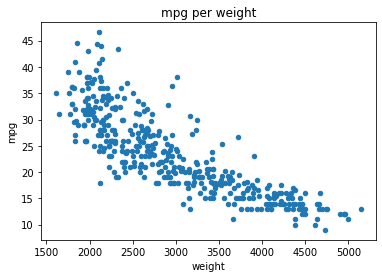

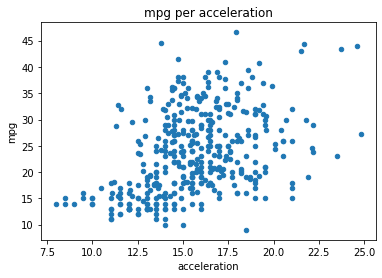

In [ ]:
import matplotlib.pyplot as plt
variable_quantitative = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
for nom_variable in variable_quantitative:
    df.plot.scatter(x=nom_variable, y='mpg')
    plt.title('mpg per '+ nom_variable)
    plt.show()

**2) Transformation du dataset : variation du taux de données manquantes**


Vous avez sans doute remarqué que le nombre de données manquantes dans ce dataset est relativement faible.
Afin de mettre en œuvre les méthodes présentées en cours et d’étudier leur efficacité, nous nous
proposons d’augmenter artificiellement le taux de données manquantes, à une valeur fixée par
l’utilisateur, en supprimant des données présentes.
Vous devez donc écrire deux fonctions :

1. une première qui supprimera aléatoirement des données dans une colonne donnée.


In [ ]:
import random
import pandas as pd

def supprimer_donnees_aleatoires_col(data1, index_colonne):
    data = data1.copy()
    # boucler sur chaque ligne du dataframe
    for i in range(len(data)):
        # supprimer aléatoirement une valeur dans la colonne donnée
        nombre_aleatoire_entier = random.randint(0, 10)
        if nombre_aleatoire_entier == 5:
            data.iloc[i, index_colonne] = None
    return data

In [ ]:
df1=supprimer_donnees_aleatoires_col(df, 1)

missing_values(df1)

,nombre_de_valeurs_manquantes,taux
mpg,8,0.019704
cylinders,36,0.088670
displacement,0,0.000000
horsepower,6,0.014778
weight,0,0.000000
acceleration,0,0.000000
model_year,0,0.000000
origin,0,0.000000
car_name,0,0.000000


In [ ]:
missing_values(df)

,nombre_de_valeurs_manquantes,taux
mpg,8,0.019704
cylinders,0,0.000000
displacement,0,0.000000
horsepower,6,0.014778
weight,0,0.000000
acceleration,0,0.000000
model_year,0,0.000000
origin,0,0.000000
car_name,0,0.000000


2. une seconde qui supprimera aléatoirement des données dans l’ensemble du dataframe (n’importe quelle colonne peut donc être concernée).


In [ ]:
import random
import pandas as pd

def supprimer_donnees_aleatoires(data1):
    data = data1.copy()
    # boucler sur chaque colonne du dataframe
    for col in data.columns:
      for i in range(len(data)):
        # supprimer aléatoirement une valeur dans la colonne
        nombre_aleatoire_entier = random.randint(0, 10)
        if nombre_aleatoire_entier == 5:
            data.at[i, col] = None
    return data

In [ ]:
df2=supprimer_donnees_aleatoires(df)
df2

missing_values(df2)

,nombre_de_valeurs_manquantes,taux
mpg,39,0.096059
cylinders,45,0.110837
displacement,31,0.076355
horsepower,50,0.123153
weight,28,0.068966
acceleration,32,0.078818
model_year,37,0.091133
origin,32,0.078818
car_name,31,0.076355


In [ ]:
missing_values(df)

,nombre_de_valeurs_manquantes,taux
mpg,8,0.019704
cylinders,0,0.000000
displacement,0,0.000000
horsepower,6,0.014778
weight,0,0.000000
acceleration,0,0.000000
model_year,0,0.000000
origin,0,0.000000
car_name,0,0.000000


In [ ]:
missing_values(df1)

,nombre_de_valeurs_manquantes,taux
mpg,8,0.019704
cylinders,36,0.088670
displacement,0,0.000000
horsepower,6,0.014778
weight,0,0.000000
acceleration,0,0.000000
model_year,0,0.000000
origin,0,0.000000
car_name,0,0.000000


**3) Utilisation de méthodes avec suppression de données**

Dans cette partie, on propose de régler le problème des données manquantes en se limitant aux
données disponibles, en réalisant soit une analyse des cas concrets, ou une analyse de cas
disponibles.
Vous devrez donc écrire deux fonctions :
1. Analyse des cas concrets : la fonction prend en entrée le dataframe et ne renvoie que
les lignes qui ne comportent pas de données manquantes.


In [ ]:
import pandas as pd

def lignes_avec_donnees_manquantes(data):
    # Sélectionner les lignes avec des valeurs manquantes
    na_rows = df[data.isna().any(axis=1)]

    # Renvoyer les lignes
    return na_rows

lignes_avec_donnees_manquantes(df2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
394,25.0,6.0,181.0,110.0,2945.0,16.4,82.0,1.0,buick century limited
397,22.0,6.0,232.0,112.0,2835.0,14.7,82.0,1.0,ford granada l
398,32.0,4.0,144.0,96.0,2665.0,13.9,82.0,3.0,toyota celica gt
399,36.0,4.0,135.0,84.0,2370.0,13.0,82.0,1.0,dodge charger 2.2


In [ ]:
lignes_avec_donnees_manquantes(df1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
27,24.0,4.0,107.0,90.0,2430.0,14.5,70.0,2.0,audi 100 ls
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
42,17.0,6.0,250.0,100.0,3329.0,15.5,71.0,1.0,chevrolet chevelle malibu


2. Analyse des données disponibles : la fonction prend en entrée le dataframe et un taux
maximal, et renvoie une copie des données où les variables dont le taux de valeurs
manquantes (cf. 2.1) dépassant ce taux ont été retirées.

In [ ]:
missing_values(df2)

,nombre_de_valeurs_manquantes,taux
mpg,39,0.096059
cylinders,45,0.110837
displacement,31,0.076355
horsepower,50,0.123153
weight,28,0.068966
acceleration,32,0.078818
model_year,37,0.091133
origin,32,0.078818
car_name,31,0.076355


In [ ]:
def supprimer_colonnes_donnees_manquantes(df, taux_max):
    result_df = df.copy()
    colonnes_a_supprimer = missing_values(df)[missing_values(df)['taux'] > taux_max].index.tolist()
    result_df.drop(colonnes_a_supprimer, axis=1, inplace=True)
    return result_df
supprimer_colonnes_donnees_manquantes(df2, 0.1)

,mpg,displacement,weight,acceleration,model_year,origin,car_name
0,18.0,307.0,NaN,12.0,70.0,NaN,chevrolet chevelle malibu
1,NaN,350.0,NaN,11.5,NaN,1.0,buick skylark 320
2,18.0,318.0,3436.0,NaN,70.0,1.0,plymouth satellite
3,16.0,304.0,NaN,12.0,70.0,1.0,amc rebel sst
4,17.0,NaN,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...
401,27.0,140.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,NaN,97.0,2130.0,24.6,NaN,2.0,vw pickup
403,32.0,135.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,120.0,2625.0,18.6,82.0,1.0,ford ranger


**4) Utilisation de méthodes avec imputation de données**

4.1.) Imputation univariée
Après avoir rappelé le principe et le fonctionnement d’une imputation univariée, utiliser la
classe sklearn.impute.SimpleImputer pour compléter les données manquantes, en
essayant différentes stratégies d’imputation.
Discuter de son intérêt, et de ses limitations potentielles.


L'imputation univariée consiste à remplacer les valeurs manquantes d'une variable par une valeur statistique (comme la moyenne ou la médiane) calculée à partir des données. Il est interessant de l'utiliser lorsqu'il y a 1% de valeur manquant sinon faire imputation multiple. Et ne peux se faire sur des données de type String


In [ ]:
from sklearn.impute import SimpleImputer

def impute_data(df, strategy):
    # Select only the numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Impute the missing values with the specified strategy for the numeric columns
    imputer = SimpleImputer(strategy=strategy)
    df_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

    # Combine the imputed numeric columns with the non-numeric columns
    non_numeric_cols = set(df.columns) - set(numeric_cols)
    df_imputed = pd.concat([df_imputed,df[non_numeric_cols]], axis=1)

    return df_imputed

# Impute the missing values using the 'mean' strategy
df_imputed = impute_data(df2, 'mean')
df_imputed


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.000000,8.0,307.000000,130.0,2963.457672,12.000000,70.000000,1.548128,chevrolet chevelle malibu
1,23.402452,8.0,350.000000,165.0,2963.457672,11.500000,75.926829,1.000000,buick skylark 320
2,18.000000,8.0,318.000000,150.0,3436.000000,15.573262,70.000000,1.000000,plymouth satellite
3,16.000000,8.0,304.000000,150.0,2963.457672,12.000000,70.000000,1.000000,amc rebel sst
4,17.000000,8.0,194.806667,140.0,3449.000000,10.500000,70.000000,1.000000,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.000000,4.0,140.000000,86.0,2790.000000,15.600000,82.000000,1.000000,ford mustang gl
402,23.402452,4.0,97.000000,52.0,2130.000000,24.600000,75.926829,2.000000,vw pickup
403,32.000000,4.0,135.000000,84.0,2295.000000,11.600000,82.000000,1.000000,dodge rampage
404,28.000000,4.0,120.000000,79.0,2625.000000,18.600000,82.000000,1.000000,ford ranger


In [ ]:
missing_values(df_imputed)

,nombre_de_valeurs_manquantes,taux
mpg,0,0.000000
cylinders,0,0.000000
displacement,0,0.000000
horsepower,0,0.000000
weight,0,0.000000
acceleration,0,0.000000
model_year,0,0.000000
origin,0,0.000000
car_name,31,0.076355


4.2.) Imputation par la méthode des k plus proches voisins (kNN)
Il est possible de réaliser l’imputation en utilisant l’algorithme des k plus proches voisins.
La solution consiste, pour une instance présentant une (ou plusieurs) donnée(s) manquante(s), à rechercher ses k plus proches voisins (au sens d’une métrique donnée). Ces
derniers seront utilisés pour imputer les valeurs manquantes en effectuant une moyenne
(éventuellement pondérée selon la distance) des variables concernées.
Nous utiliserons la classe sklearn.impute.KNNImputer qui permet de mettre en
œuvre cette méthode d’imputation.
a) Expliquer le fonctionnement de la métrique par défaut utilisée par cette classe
pour déterminer ses plus proches voisins.

La classe KNNImputer utilise la distance euclidienne par défaut entre deux points pour déterminer les k plus proches voisins d'une instance.

b) Réaliser l’imputation des données manquantes en utilisant cette classe.


In [ ]:
missing_values(df2)

,nombre_de_valeurs_manquantes,taux
mpg,39,0.096059
cylinders,45,0.110837
displacement,31,0.076355
horsepower,50,0.123153
weight,28,0.068966
acceleration,32,0.078818
model_year,37,0.091133
origin,32,0.078818
car_name,31,0.076355


In [ ]:
from sklearn.impute import KNNImputer

def imputer_knn(data1, k_neighbors=5):
    data = data1.copy()
    data = data.drop('car_name', axis=1)
    imputer = KNNImputer(n_neighbors=k_neighbors)
    imputed_data = imputer.fit_transform(data)
    return pd.DataFrame(imputed_data, columns=data.columns)

knn_imp = imputer_knn(df2,5)
knn_imp

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.00,8.0,307.0,130.0,4017.8,12.00,70.0,1.0
1,14.40,8.0,350.0,165.0,4199.2,11.50,73.8,1.0
2,18.00,8.0,318.0,150.0,3436.0,12.54,70.0,1.0
3,16.00,8.0,304.0,150.0,4030.0,12.00,70.0,1.0
4,17.00,8.0,319.4,140.0,3449.0,10.50,70.0,1.0
...,...,...,...,...,...,...,...,...
401,27.00,4.0,140.0,86.0,2790.0,15.60,82.0,1.0
402,35.38,4.0,97.0,52.0,2130.0,24.60,79.8,2.0
403,32.00,4.0,135.0,84.0,2295.0,11.60,82.0,1.0
404,28.00,4.0,120.0,79.0,2625.0,18.60,82.0,1.0


In [ ]:
missing_values(knn_imp)

,nombre_de_valeurs_manquantes,taux
mpg,0,0.0
cylinders,0,0.0
displacement,0,0.0
horsepower,0,0.0
weight,0,0.0
acceleration,0,0.0
model_year,0,0.0
origin,0,0.0


4.3.a  Expliquer succinctement le fonctionnement par défaut de cette classe.  

La classe sklearn.impute.IterativeImputer permet de remplacer les données manquantes dans un ensemble de données en utilisant des estimateurs pour prédire les valeurs manquantes à partir des autres paramètres présents. Elle utilise une méthode de régression linéaire et une stratégie bayésienne par défaut, et effectue un processus itératif jusqu'à convergence ou jusqu'à ce qu'un nombre maximum d'itérations soit atteint.

4.3.b Réaliser l’imputation des données manquantes en utilisant cette classe.



In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

data= df.copy()
X = data.iloc[:, 0:8]
y = data.iloc[:,7]

# Ajout de données manquantes artificielles
mask = np.random.rand(*X.shape) < 0.1
X[mask] = np.nan

# Imputation des données manquantes
imp = IterativeImputer(max_iter=10, random_state=0)
X_imputed = imp.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed)
# Affichage des résultats
X_imputed_df

,0,1,2,3,4,5,6,7
0,18.000000,8.000000,307.000000,130.0,3504.000000,12.0,70.000000,1.000000
1,15.000000,8.000000,350.000000,165.0,3941.971564,11.5,70.000000,1.000000
2,18.000000,7.339658,318.000000,150.0,3436.000000,11.0,73.108349,1.000000
3,16.000000,8.000000,304.000000,150.0,3433.000000,12.0,70.000000,1.224410
4,17.000000,8.000000,302.000000,140.0,3449.000000,10.5,70.000000,1.000000
...,...,...,...,...,...,...,...,...
401,27.000000,4.000000,127.578992,86.0,2790.000000,15.6,82.000000,1.789706
402,44.000000,3.502869,71.698514,52.0,2130.000000,24.6,83.977256,2.000000
403,32.000000,4.000000,135.000000,84.0,2295.000000,11.6,82.000000,1.000000
404,29.804876,4.000000,120.000000,79.0,2625.000000,18.6,82.000000,1.000000


c) Discuter de son intérêt et des limitations potentielles, en abordant notamment le
cas de données manquantes de type MAR ou MNAR, et de la différence avec les
méthodes précédentes.

**5) Tâche de régression associée, évaluation des méthodes d’imputation**

On cherche maintenant à prédire la variable mpg à l’aide d’une (ou plusieurs) variable(s) explicative(s). On utilisera la classe sklearn.linear_model.LinearRegression.

5.1. Analyse de la matrice de corrélation
En travaillant sur les données initiales (sans données manquantes), calculer et afficher la
matrice de corrélation :
import seaborn as sns
corrmat = data.corr()
sns.heatmap(corrmat,annot = True)
Déterminer la variable explicative la plus corrélée (notée X) à la variable à prédire (y).

The variable with the highest correlation positive with cylinders is  displacement
The variable with the highest correlation negative with cylinders is  acceleration


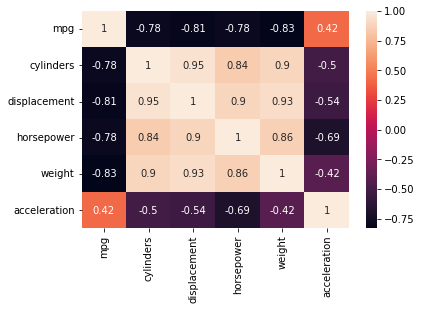

In [ ]:
import seaborn as sns


def correlation(y):
  data = df.copy()
  # Drop rows with missing values
  data = data.dropna()
  data = data.drop('origin', axis=1)
  data = data.drop('model_year', axis=1)
  # Calculate the correlation matrix
  corrmat = data.corr()
  # Plot the heatmap
  sns.heatmap(corrmat, annot=True)
  # Extract the correlation coefficients between 'mpg' and the other variables
  mpg_correlations = corrmat.loc[y, :]
  mpg_correlations = mpg_correlations.drop(y)
  mpg_correlations = mpg_correlations.abs()
  # Get the name of the variable with the highest correlation
  most_correlated_var = mpg_correlations.idxmax()
  most_correlated_var_inv = mpg_correlations.idxmin()
  print('The variable with the highest correlation positive with '+ y + ' is ', most_correlated_var)
  print('The variable with the highest correlation negative with '+ y +' is ', most_correlated_var_inv)

correlation("cylinders")

The variable with the highest correlation positive with mpg is  weight
The variable with the highest correlation negative with mpg is  acceleration


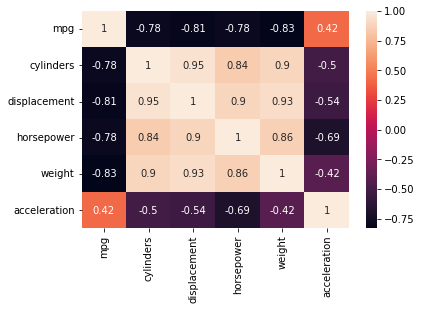

In [ ]:
correlation("mpg")

5.2. Régression linéaire sur les données complètes
a) Séparer les données en base d’apprentissage (70%) et de test.   
b) Déterminer les coefficients de la droite de régression (fonction fit) sur les données
d’apprentissage.  
c) Effectuer les prédictions sur les données de test (fonction predict) et estimer les
performances : RMSE (Root Mean Squared Error) et R2
(r2_score)  

In [ ]:
from sklearn.model_selection import train_test_split
data = df.copy()
data = data.drop('car_name', axis=1)
data = data.dropna()
# Séparation en variables explicatives (X) et variable cible (y)
X = data.drop('mpg', axis=1)
y = data['mpg']

# Séparation en base d'apprentissage et de test (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
# Instancier le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'apprentissage
model.fit(X_train, y_train)

# Obtenir les coefficients de la droite de régression
coef = model.coef_
intercept = model.intercept_

print("Coefficients de la droite de régression :")
for i in range(len(X.columns)):
    print(f"{X.columns[i]} : {coef[i]}")

print(f"Intercept : {intercept}")

Coefficients de la droite de régression :
cylinders : -0.3596379665213993
displacement : 0.015793437206865504
horsepower : -0.028069889973141395
weight : -0.006005773898297316
acceleration : 0.04119833321045351
model_year : 0.7420859971934343
origin : 1.6737988514074762
Intercept : -16.368259804717333


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer le R2
r2 = r2_score(y_test, y_pred)
print("R2 score :", r2)

# Calculer le RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE :", rmse)

R2 score : 0.8097361276184133
RMSE : 3.1726767537190628


5.3. Régression linéaire sur les données manquantes après imputation
Répéter les expériences précédentes en considérant successivement 20% et 50% de
données manquantes imputées.
Présenter les résultats sous forme d’un graphe comparatif que vous commenterez.  

In [ ]:
def supprimer_donnees_aleatoires_5_3(data1,number):
    data = data1.copy()
    # boucler sur chaque colonne du dataframe
    for col in data.columns:
      for i in range(len(data)):
        # supprimer aléatoirement une valeur dans la colonne
        nombre_aleatoire_entier = random.randint(0,100)
        if nombre_aleatoire_entier >= 0 and nombre_aleatoire_entier <= number :
            data.at[i, col] = None
    return data

#mettre Nan Value sur df 20%
twenty_df = supprimer_donnees_aleatoires_5_3(df,20)
#mettre Nan Value sur df 50%
fifty_df = supprimer_donnees_aleatoires_5_3(df,50)
#Knn sur les deux
#Le KNNImputer fourni des estimations plus precises que les methodes univariées telles que la mediane ou la moyenne.
#Le KNNImputer prend en compte les relation entre les variables.
knn_twenty_df = imputer_knn(twenty_df,5)
knn_fifty_df = imputer_knn(fifty_df,5)



In [ ]:
missing_values(twenty_df)

,nombre_de_valeurs_manquantes,taux
mpg,89,0.219212
cylinders,92,0.226601
displacement,80,0.197044
horsepower,89,0.219212
weight,67,0.165025
acceleration,69,0.169951
model_year,71,0.174877
origin,98,0.241379
car_name,104,0.256158


In [ ]:
missing_values(knn_twenty_df)

,nombre_de_valeurs_manquantes,taux
mpg,0,0.0
cylinders,0,0.0
displacement,0,0.0
horsepower,0,0.0
weight,0,0.0
acceleration,0,0.0
model_year,0,0.0
origin,0,0.0


In [ ]:
missing_values(fifty_df)

,nombre_de_valeurs_manquantes,taux
mpg,199,0.490148
cylinders,200,0.492611
displacement,211,0.519704
horsepower,219,0.539409
weight,211,0.519704
acceleration,206,0.507389
model_year,197,0.485222
origin,210,0.517241
car_name,213,0.524631


In [ ]:
missing_values(knn_fifty_df)

,nombre_de_valeurs_manquantes,taux
mpg,0,0.0
cylinders,0,0.0
displacement,0,0.0
horsepower,0,0.0
weight,0,0.0
acceleration,0,0.0
model_year,0,0.0
origin,0,0.0


In [ ]:
(~(knn_twenty_df == knn_fifty_df)).sum()

mpg             242
cylinders       201
displacement    251
horsepower      264
weight          251
acceleration    233
model_year      231
origin          213
dtype: int64

In [ ]:

from sklearn.model_selection import train_test_split
data = knn_twenty_df.copy()
data = data.dropna()
# Séparation en variables explicatives (X) et variable cible (y)
X = data.drop('mpg', axis=1)
y = data['mpg']

# Séparation en base d'apprentissage et de test (80/50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression
# Instancier le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'apprentissage
model.fit(X_train, y_train)

# Obtenir les coefficients de la droite de régression
coef = model.coef_
intercept = model.intercept_

print("Coefficients de la droite de régression :")
for i in range(len(X.columns)):
    print(f"{X.columns[i]} : {coef[i]}")

print(f"Intercept : {intercept}")
from sklearn.metrics import r2_score, mean_squared_error

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer le R2
r2 = r2_score(y_test, y_pred)
print("R2 score :", r2)

# Calculer le RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE :", rmse)

Coefficients de la droite de régression :
cylinders : -0.9858141144274867
displacement : 0.012612857278382562
horsepower : -0.03302089623280347
weight : -0.004185286419016987
acceleration : -0.16160170720878458
model_year : 0.6042755116275846
origin : 1.65040469203313
Intercept : -3.3916610269693592
R2 score : 0.693658125816767
RMSE : 4.477396325276835


In [ ]:
from sklearn.model_selection import train_test_split
data = knn_fifty_df.copy()
data = data.dropna()
# Séparation en variables explicatives (X) et variable cible (y)
X = data.drop('mpg', axis=1)
y = data['mpg']

# Séparation en base d'apprentissage et de test (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression
# Instancier le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'apprentissage
model.fit(X_train, y_train)

# Obtenir les coefficients de la droite de régression
coef = model.coef_
intercept = model.intercept_

print("Coefficients de la droite de régression :")
for i in range(len(X.columns)):
    print(f"{X.columns[i]} : {coef[i]}")

print(f"Intercept : {intercept}")
from sklearn.metrics import r2_score, mean_squared_error

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer le R2
r2 = r2_score(y_test, y_pred)
print("R2 score :", r2)

# Calculer le RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE :", rmse)

Coefficients de la droite de régression :
cylinders : -0.92550146648726
displacement : -0.006582667320952414
horsepower : -0.03250314807568574
weight : -0.0023062131413504345
acceleration : -0.3175745842311071
model_year : 0.46173192847767336
origin : 1.7505984998712631
Intercept : 6.773224640335698
R2 score : 0.6801523753405649
RMSE : 3.7521538811393165


5.4.Pour finir…
Deux variables sont corrélées en valeur absolue… retournez au 5.1 pour vérifier la pertinence de votre choix.
Une corrélation linéaire peut être encore améliorée en transformant astucieusement les
données : comment ?
En tenant compte de ces deux remarques, refaire les parties 5.2 et 5.3 si nécessaire.
Une grossière erreur s’est glissée quelque part. La question est : où ? Expliquez.

l'acceleration est à transformer car ses la valeurs de correlation positive et negative sont loins de 1 entre -0.6 et 0.7 tandis que les autres sont entre -0.9 et 0.8

l'acceleration se calcule de façon quadratique et non lineaire s^-2 au lieu de s nous devons donc le transformer

The variable with the highest correlation positive with acceleration is  horsepower
The variable with the highest correlation negative with acceleration is  mpg


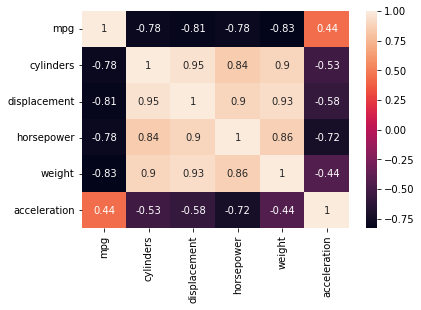

In [ ]:
import numpy as np
import pandas as pd

# appliquer la transformation racine carrée à la colonne 'A'
df['acceleration'] = np.sqrt(df['acceleration'])
correlation('acceleration')


Nous pouvons voir que nous avons ameliorer la correlation